In [1]:
import pandas as pd
from src.Particle import ParticleType
from src.JetBuilder import JetBuilder
from src.JetImage import JetImage, JetImageCalculator, JetImageAvarageCalculator

In [2]:
data_gluon = pd.read_csv('../Data/g_jets.csv', header=None, sep=' ')
data_quark = pd.read_csv('../Data/q_jets.csv', header=None, sep=' ')
data_top = pd.read_csv('../Data/t_jets.csv', header=None, sep=' ')

In [3]:
# creating the list with the jets objects
jet_builder = JetBuilder()
# For the data exploration this amount of jets is enough
# More than that the evaluation stars to become really slower
gluon_jets = jet_builder.create_jets(data_frame=data_gluon[:5000], jet_type=ParticleType.Gluon)
quark_jets = jet_builder.create_jets(data_frame=data_quark[:5000], jet_type=ParticleType.LightQuark)
top_jets = jet_builder.create_jets(data_frame=data_top[:5000], jet_type=ParticleType.Top)

****Single jet images****

In [4]:
jet_image = JetImage((-0.4, 0.4), (-0.4, 0.4), 16, 16, JetImageCalculator())

In [5]:
first_gluon_image = jet_image.create_jet_image(gluon_jets[10])

In [6]:
from matplotlib.colors import LinearSegmentedColormap
# Create a custom colormap that transitions from white to blue to red
colors = [(1, 1, 1), (0, 0, 1), (1, 0, 0)]  # White, Blue, Red
n_bins = 100  # Number of bins for interpolation
custom_cmap = LinearSegmentedColormap.from_list('white_blue_red', colors, N=n_bins)

Text(0, 0.5, '$\\eta^{rel}$')

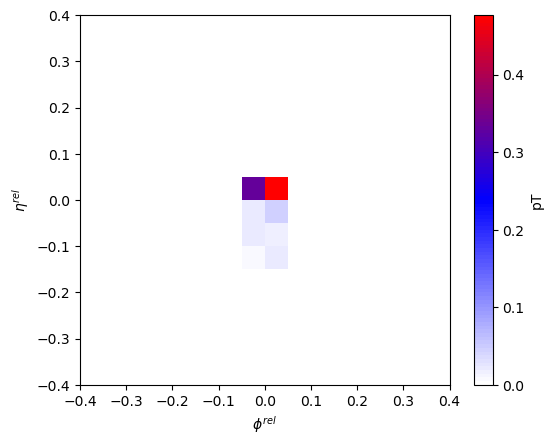

In [14]:
import matplotlib.pyplot as plt
# import numpy as np
plt.imshow(first_gluon_image, cmap=custom_cmap, extent=(-0.4, 0.4, -0.4, 0.4))
plt.colorbar(label='pT')
plt.xlabel(r'$\phi^{rel}$')
plt.ylabel(r'$\eta^{rel}$')

****Avarage Jet Image****

In [8]:
single_jet_image = JetImageCalculator()
avg_jet_image = JetImageAvarageCalculator(jet_image_calculator=single_jet_image)
jet_image_avg = JetImage((-0.4, 0.4), (-0.4, 0.4), 16, 16, avg_jet_image)

****Top jets****

Text(0, 0.5, '$\\eta^{rel}$')

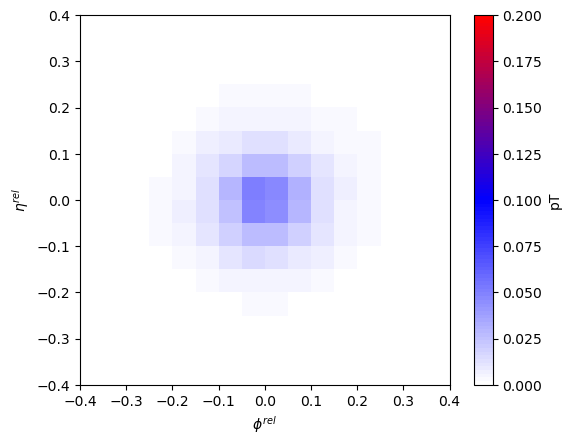

In [26]:
# evaluating the image
avg_jet_image = jet_image_avg.create_jet_image(top_jets)
# plotting the grid
plt.imshow(avg_jet_image, cmap=custom_cmap, extent=(-0.4, 0.4, -0.4, 0.4), vmin=0, vmax=0.2)
plt.colorbar(label='pT')
plt.xlabel(r'$\phi^{rel}$')
plt.ylabel(r'$\eta^{rel}$')

****Gluon Jets****

Text(0, 0.5, '$\\eta^{rel}$')

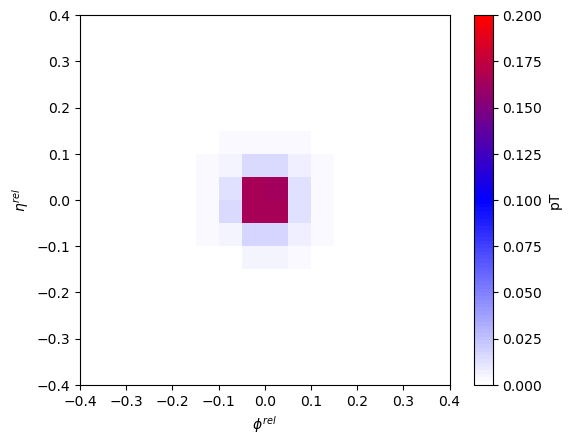

In [27]:
# evaluating the image
avg_jet_image = jet_image_avg.create_jet_image(gluon_jets)
# plotting the grid
plt.imshow(avg_jet_image, cmap=custom_cmap, extent=(-0.4, 0.4, -0.4, 0.4), vmin=0, vmax=0.2)
plt.colorbar(label='pT')
plt.xlabel(r'$\phi^{rel}$')
plt.ylabel(r'$\eta^{rel}$')

****Quark Jets****

Text(0, 0.5, '$\\eta^{rel}$')

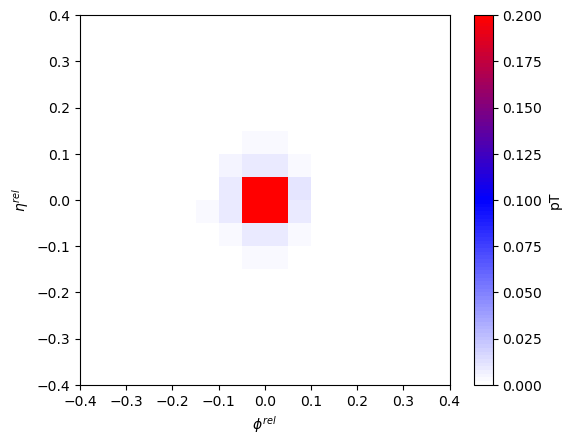

In [28]:
# evaluating the image
avg_jet_image = jet_image_avg.create_jet_image(quark_jets)
# plotting the grid
plt.imshow(avg_jet_image, cmap=custom_cmap, extent=(-0.4, 0.4, -0.4, 0.4), vmin=0, vmax=0.2)
plt.colorbar(label='pT')
plt.xlabel(r'$\phi^{rel}$')
plt.ylabel(r'$\eta^{rel}$')